In [65]:
from setup import *
from utils import (
    load_data, 
    add_features, 
    add_labels, 
    plot_cumulative_returns, 
    split_data,
    plot_precision,
    calculate_returns
    )

In [66]:
asset_data = load_data("USDBRL=X", "2023-01-01", "2025-10-01")
asset_data = add_features(add_labels(asset_data))
asset_data.head()

/home/felipe-nicoletti/Projetos/Pessoal/market-data-market-prediction-ml-study/utils.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval="1wk")
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,target,returns,volatility,ma_4,ma_12,ma_ratio,momentum_5,momentum_10,momentum_50
Date,,,,,,,,,,,,,,
2023-12-17,4.8575,4.9494,4.853300,4.919657,0,0,-0.016023,0.012205,4.900925,4.957225,0.988643,-0.0469,-0.2207,-0.3668
2023-12-24,4.8510,4.8909,4.761507,4.857600,0,1,-0.001338,0.010384,4.893900,4.932425,0.992189,-0.0503,-0.1820,-0.2435
2023-12-31,4.8736,4.9333,4.838949,4.838949,0,0,0.004659,0.004241,4.879675,4.915375,0.992737,-0.0055,-0.1400,-0.3328
2024-01-07,4.8527,4.9064,4.831500,4.873100,0,1,-0.004288,0.006327,4.858700,4.900350,0.991501,-0.0778,-0.0469,-0.2551
2024-01-14,4.9300,4.9528,4.839500,4.852900,0,0,0.015929,0.014296,4.876825,4.893383,0.996616,-0.0066,0.0257,-0.2209


In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [68]:
X  = asset_data[["ma_4","ma_ratio","volatility","momentum_50","Close"]]
y = asset_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [69]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.42857142857142855, 0.9444444444444444, 'Close <= 5.465\ngini = 0.49\nsamples = 49\nvalue = [21, 28]\nclass = Up'),
 Text(0.14285714285714285, 0.8333333333333334, 'momentum_50 <= -0.3\ngini = 0.32\nsamples = 20\nvalue = [4, 16]\nclass = Up'),
 Text(0.2857142857142857, 0.8888888888888888, 'True  '),
 Text(0.07142857142857142, 0.7222222222222222, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Down'),
 Text(0.21428571428571427, 0.7222222222222222, 'volatility <= 0.004\ngini = 0.266\nsamples = 19\nvalue = [3, 16]\nclass = Up'),
 Text(0.14285714285714285, 0.6111111111111112, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Up'),
 Text(0.2857142857142857, 0.6111111111111112, 'volatility <= 0.005\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = Up'),
 Text(0.21428571428571427, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Down'),
 Text(0.35714285714285715, 0.5, 'volatility <= 0.01\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = Up'),
 Text(0.2857142857142857, 0.38

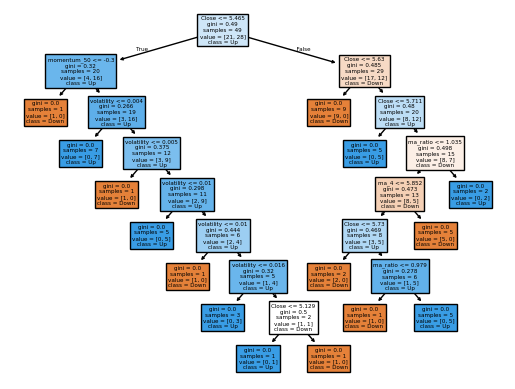

In [70]:
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=["Down", "Up"])

In [71]:
predictions = classifier.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=["Down", "Up"]))

              precision    recall  f1-score   support

        Down       0.53      0.50      0.51        18
          Up       0.47      0.50      0.48        16

    accuracy                           0.50        34
   macro avg       0.50      0.50      0.50        34
weighted avg       0.50      0.50      0.50        34



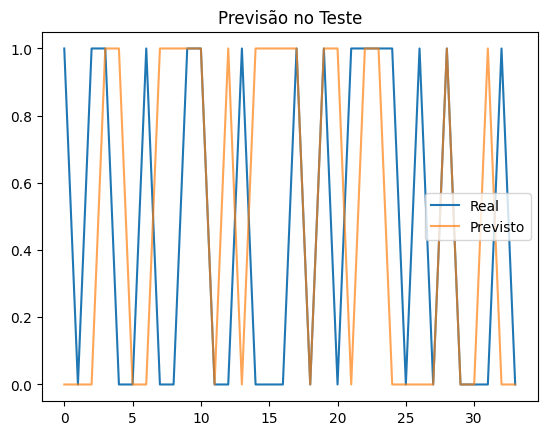

In [73]:
plot_precision(y_test.values, predictions)

In [74]:
all_predictions = classifier.predict(X)

asset_data = calculate_returns(asset_data, all_predictions)
asset_data.head()

,Close,High,Low,Open,Volume,target,returns,volatility,ma_4,ma_12,ma_ratio,momentum_5,momentum_10,momentum_50,predicted_target,real_return,cumulative_real_return,cumulative_predicted_return
Date,,,,,,,,,,,,,,,,,,
2023-12-17,4.8575,4.9494,4.853300,4.919657,0,0,-0.016023,0.012205,4.900925,4.957225,0.988643,-0.0469,-0.2207,-0.3668,0,-0.000000,0.983977,1.000000
2023-12-24,4.8510,4.8909,4.761507,4.857600,0,1,-0.001338,0.010384,4.893900,4.932425,0.992189,-0.0503,-0.1820,-0.2435,1,-0.001338,0.982660,0.998662
2023-12-31,4.8736,4.9333,4.838949,4.838949,0,0,0.004659,0.004241,4.879675,4.915375,0.992737,-0.0055,-0.1400,-0.3328,0,0.000000,0.987238,0.998662
2024-01-07,4.8527,4.9064,4.831500,4.873100,0,1,-0.004288,0.006327,4.858700,4.900350,0.991501,-0.0778,-0.0469,-0.2551,1,-0.004288,0.983005,0.994379
2024-01-14,4.9300,4.9528,4.839500,4.852900,0,0,0.015929,0.014296,4.876825,4.893383,0.996616,-0.0066,0.0257,-0.2209,1,0.015929,0.998663,1.010219


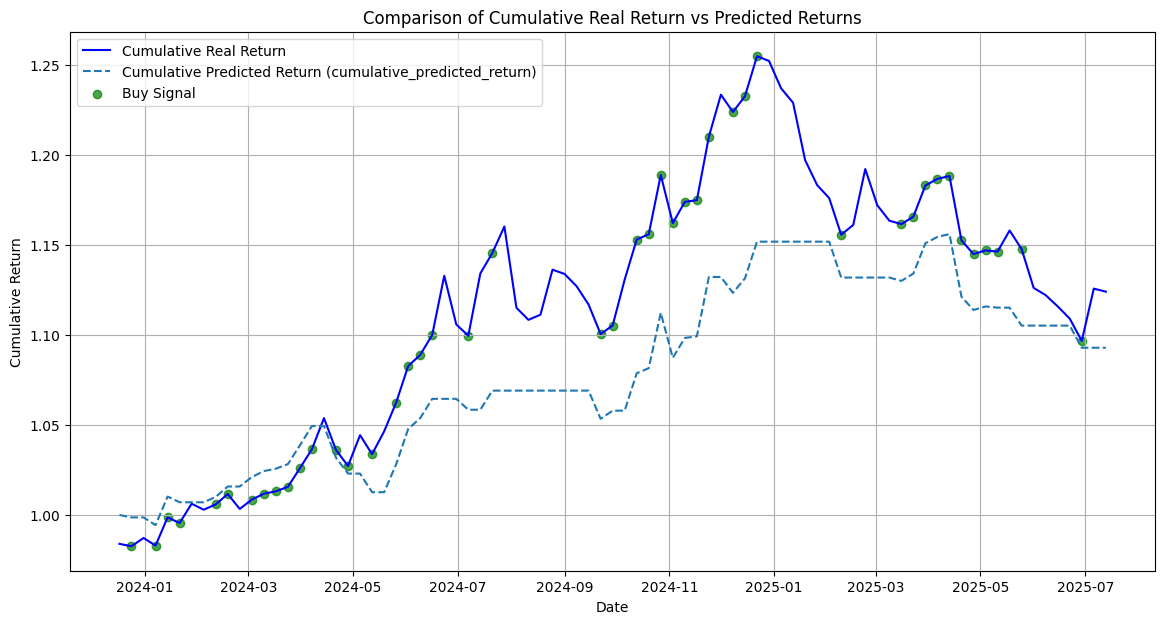

In [75]:
plot_cumulative_returns(
    data=asset_data,
    real_column="cumulative_real_return",
    predicted_columns=["cumulative_predicted_return"],
    target_column="predicted_target"
)

In [76]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(random_state=42, n_estimators=200)
random_forest_classifier.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
predictions_rf = random_forest_classifier.predict(X_test)

In [78]:
predictions_rf = random_forest_classifier.predict(X_test)
print(classification_report(y_test, predictions_rf, target_names=["Down", "Up"]))

              precision    recall  f1-score   support

        Down       0.67      0.56      0.61        18
          Up       0.58      0.69      0.63        16

    accuracy                           0.62        34
   macro avg       0.62      0.62      0.62        34
weighted avg       0.63      0.62      0.62        34



In [79]:
all_predictions = random_forest_classifier.predict(X)

asset_data = calculate_returns(asset_data, all_predictions)
asset_data.head()

,Close,High,Low,Open,Volume,target,returns,volatility,ma_4,ma_12,ma_ratio,momentum_5,momentum_10,momentum_50,predicted_target,real_return,cumulative_real_return,cumulative_predicted_return
Date,,,,,,,,,,,,,,,,,,
2023-12-17,4.8575,4.9494,4.853300,4.919657,0,0,-0.016023,0.012205,4.900925,4.957225,0.988643,-0.0469,-0.2207,-0.3668,1,-0.016023,0.983977,0.983977
2023-12-24,4.8510,4.8909,4.761507,4.857600,0,1,-0.001338,0.010384,4.893900,4.932425,0.992189,-0.0503,-0.1820,-0.2435,1,-0.001338,0.982660,0.982660
2023-12-31,4.8736,4.9333,4.838949,4.838949,0,0,0.004659,0.004241,4.879675,4.915375,0.992737,-0.0055,-0.1400,-0.3328,0,0.000000,0.987238,0.982660
2024-01-07,4.8527,4.9064,4.831500,4.873100,0,1,-0.004288,0.006327,4.858700,4.900350,0.991501,-0.0778,-0.0469,-0.2551,1,-0.004288,0.983005,0.978446
2024-01-14,4.9300,4.9528,4.839500,4.852900,0,0,0.015929,0.014296,4.876825,4.893383,0.996616,-0.0066,0.0257,-0.2209,0,0.000000,0.998663,0.978446


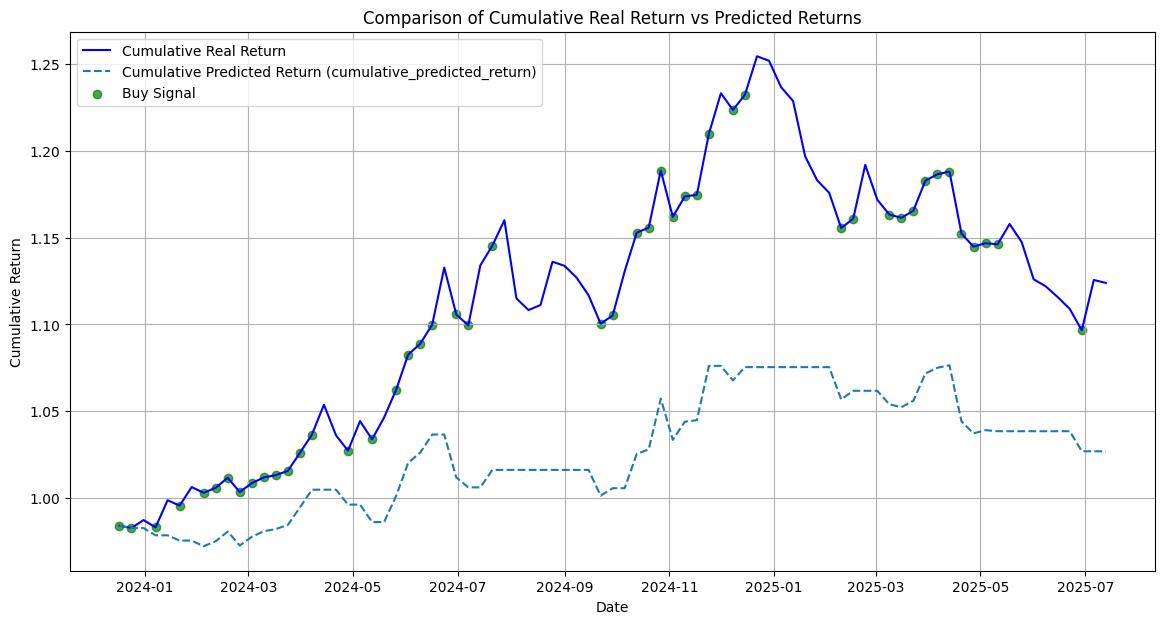

In [80]:
plot_cumulative_returns(
    data=asset_data,
    real_column="cumulative_real_return",
    predicted_columns=["cumulative_predicted_return"],
    target_column="predicted_target"
)